In [1]:
print("sdfghjk")

sdfghjk


In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent   # goes from notebook/ → Calculation_agent/
sys.path.insert(0, str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)


Project root added: f:\Git_gen_ai_project\calculator-agentic-AI-project


In [3]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.model_loader import ModelLoader
from prompt_library.prompt import SYSTEM_PROMPT
from tools.addition_tool import add_numbers
from tools.mul_tool import multiply_numbers
from tools.sub_tool import subtract_numbers


In [4]:
class GraphBuilder :
    def __init__(self):
        self.model_loader =  ModelLoader()
        self.llm = self.model_loader.load_llm()
        self.mul_tool = multiply_numbers()
        self.sub_tool = subtract_numbers()
        self.addition_tool = add_numbers()
        self.tools = [self.mul_tool , self.addition_tool , self.sub_tool]
        self.llm_with_tools  = self.llm.bind_tools(self.tools)
        self.system_prompt = SYSTEM_PROMPT
    
    def agent_node(self , state : MessagesState):
        messages = [self.system_prompt] + state["messages"]
        response = self.llm_with_tools.invoke(messages)
        return {"messages": [response]}

    def build(self):
        graph = StateGraph(MessagesState)
        graph.add_node("agent", self.agent_node)
        graph.add_node("tools" , ToolNode(self.tools))
        
        graph.add_edge(START , "agent")
        graph.add_conditional_edges("agent" , tools_condition)
        graph.add_edge("tools" , "agent")
        graph.add_edge("agent" ,END)
        
        return graph.compile

In [5]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.model_loader import ModelLoader
from prompt_library.prompt import SYSTEM_PROMPT
from tools.addition_tool import add_numbers
from tools.mul_tool import multiply_numbers
from tools.sub_tool import subtract_numbers


class GraphBuilder:
    def __init__(self):
        self.model_loader = ModelLoader()
        self.llm = self.model_loader.load_llm()

        self.tools = [
            multiply_numbers,
            add_numbers,
            subtract_numbers
        ]

        self.llm_with_tools = self.llm.bind_tools(self.tools)
        self.system_prompt = SYSTEM_PROMPT

    def agent_node(self, state: MessagesState):
        messages = [self.system_prompt] + state["messages"]
        response = self.llm_with_tools.invoke(messages)
        return {"messages": [response]}

    def build(self):
        graph = StateGraph(MessagesState)

        graph.add_node("agent", self.agent_node)
        graph.add_node("tools", ToolNode(self.tools))

        graph.add_edge(START, "agent")
        graph.add_conditional_edges("agent", tools_condition)
        graph.add_edge("tools", "agent")
        graph.add_edge("agent", END)

        return graph.compile()   # ✅ FIXED


In [6]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.model_loader import ModelLoader
from prompt_library.prompt import SYSTEM_PROMPT
from tools.addition_tool import add_numbers
from tools.mul_tool import multiply_numbers
from tools.sub_tool import subtract_numbers


In [7]:
prompt = "your are intelligent maths solver ai so solve this question "

LLM loading....


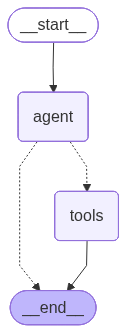

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.model_loader import ModelLoader
from prompt_library.prompt import SYSTEM_PROMPT
from tools.addition_tool import add_numbers
from tools.mul_tool import multiply_numbers
from tools.sub_tool import subtract_numbers

class GraphBuilder:
    def __init__(self):
        self.model_loader = ModelLoader()
        self.llm = self.model_loader.load_llm()

        self.tools = [
            multiply_numbers,
            add_numbers,
            subtract_numbers
        ]

        self.llm_with_tools = self.llm.bind_tools(self.tools)
        self.system_prompt = SYSTEM_PROMPT

    def agent_node(self, state: MessagesState):
        messages = [self.system_prompt] + state["messages"]
        response = self.llm_with_tools.invoke(messages)
        return {"messages": [response]}

    def build(self):
        graph = StateGraph(MessagesState)

        # Nodes
        graph.add_node("agent", self.agent_node)
        graph.add_node("tools", ToolNode(self.tools))

        # Edges
        graph.add_edge(START, "agent")
        graph.add_conditional_edges("agent", "tools")
        graph.add_edge("tools", END)
        # graph.add_edge("agent", END)

        return graph.compile()


# -----------------------------
# Visualization
# -----------------------------
from IPython.display import Image, display

gb = GraphBuilder()
compiled_graph = gb.build()

# Get the underlying graph (required for drawing)
graph_viz = compiled_graph.get_graph()

# Draw the mermaid diagram as PNG
png_bytes = graph_viz.draw_mermaid_png()

display(Image(png_bytes))

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

NameError: name 'graph' is not defined